In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
df = pd.read_csv('train.csv', dtype={'id':'uint32', 'provincia':'category', 'tipodepropiedad':'category', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'})

### Objetivo
Reducir el uso de memoria innecesaria

In [3]:
# Todos aquellas columnas que no tengan valores nulos pueden ser casteadas directamente en la lectura del archivo.
df.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [4]:
df.gimnasio.value_counts()

False    225006
True      14994
Name: gimnasio, dtype: int64

In [5]:
# Casteamos gimnasio a bool

In [6]:
df.usosmultiples.value_counts()

False    226778
True      13222
Name: usosmultiples, dtype: int64

In [7]:
# Casteamos usos multiples a bool

In [8]:
df.piscina.value_counts()

False    219028
True      20972
Name: piscina, dtype: int64

In [9]:
# Casteamos piscina a bool

In [10]:
df.escuelascercanas.value_counts()

False    133406
True     106594
Name: escuelascercanas, dtype: int64

In [11]:
# Casteamos escuelas cercanas a bool

In [12]:
df.centroscomercialescercanos.value_counts()

False    144832
True      95168
Name: centroscomercialescercanos, dtype: int64

In [13]:
# Casteamos centros comerciales cercanos a bool

In [14]:
# Ahora casteamos los tipos que pueden ser de tipo categorico, como es el caso de 'provincia' y 'tipodepropiedad'.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null uint32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                       

In [16]:
# Ahora vamos a castear los datos de tipo float64 que no necesitan esta precision a enteros, o flotantes de menor
# precision, segun corresponda.

df['antiguedad'].max()

80.0

In [17]:
# Vemos que antiguedad tiene un valor maximo de 80 y son valores enteros, por lo que con uint8 nos alcanza.
# Como antiguedad tiene valores nulos, no podremos hacer una conversion directa, sin antes tener en cuenta
# estos valores. Para eso, les pondremos el valor '255' para poder convertir y luego volvemos a NaN.\\

# Repetiremos el mismo proceso para habitaciones, garages, y banos. Todos estos valores son enteros positivos,
# reescribiremos los NaN como -1.

In [18]:
df['antiguedad'].isnull().value_counts()

False    196445
True      43555
Name: antiguedad, dtype: int64

In [19]:
df['habitaciones'].max()

10.0

In [20]:
df['garages'].max()

3.0

In [21]:
df['banos'].max()

4.0

In [22]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)

In [23]:
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)

In [24]:
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)

In [25]:
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null uint32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null category
antiguedad                    240000 non-null int8
habitaciones                  240000 non-null int8
garages                       240000 non-null int8
banos                         240000 non-null int8
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non

In [27]:
df['precio'].map(lambda x: np.uint32(x) != x).any()

False

In [28]:
# Como vemos, el precio puede ser convertido a un entero unsigned de 32 sin perder datos.
df['precio'] = df['precio'].astype('uint32')

In [29]:
df.dtypes

id                              uint32
titulo                          object
descripcion                     object
tipodepropiedad               category
direccion                       object
ciudad                          object
provincia                     category
antiguedad                        int8
habitaciones                      int8
garages                           int8
banos                             int8
metroscubiertos                float64
metrostotales                  float64
idzona                         float64
lat                            float64
lng                            float64
fecha                           object
gimnasio                          bool
usosmultiples                     bool
piscina                           bool
escuelascercanas                  bool
centroscomercialescercanos        bool
precio                          uint32
dtype: object

In [30]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null uint32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null category
antiguedad                    240000 non-null int8
habitaciones                  240000 non-null int8
garages                       240000 non-null int8
banos                         240000 non-null int8
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non

In [32]:
df['idzona'].isnull().value_counts()

False    211379
True      28621
Name: idzona, dtype: int64

In [33]:
# Para idzonas, vamos a llenar los valores NaN con el valor -1, y castear los floats de 64 a ints de 32.

In [34]:
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'].map(lambda x: np.int32(x) != x).any()

False

In [35]:
# Vemos que podemos castear a enteros de 32 bits sin perder data.
df['idzona'] = df['idzona'].astype(np.int32)

In [36]:
#Repetimos el procedimiento para metroscubiertos y metrostotales.

In [37]:
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'].map(lambda x: np.int16(x) != x).any()

False

In [38]:
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)

In [39]:
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'].map(lambda x: np.int16(x) != x).any()

False

In [40]:
df['metrostotales'] = df['metrostotales'].astype(np.int16)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null uint32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null category
antiguedad                    240000 non-null int8
habitaciones                  240000 non-null int8
garages                       240000 non-null int8
banos                         240000 non-null int8
metroscubiertos               240000 non-null int16
metrostotales                 240000 non-null int16
idzona                        240000 non-null int32
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null 

In [146]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [46]:
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

In [62]:
wordcloud = WordCloud(width=450, height=450, margin=0, background_color='#CB7664').generate(text)


In [141]:

df2 = df.loc[:5000, :]

In [142]:
PALABRAS_NO_DESEADAS = ["con","para","todo", "cuenta","tiene"]
descripciones = df2['descripcion'].dropna().to_list()
words = ""
for descripcion in descripciones:
    palabras = descripcion.split()
    
    for palabra in palabras:
        palabra.lower()
        if (palabra.isalpha() and (len(palabra) > 3) and palabra not in PALABRAS_NO_DESEADAS):
            words+=palabra+' '
words= words.rstrip(' ')
        
        

In [159]:
import os
from PIL import Image

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

casa = np.array(Image.open(path.join(d, "casita.png")))


stopwords = set(STOPWORDS)
stopwords.add("said")


In [160]:
wc = WordCloud(width=900, height=900, margin=0, background_color='white', mask=casa, stopwords=stopwords)


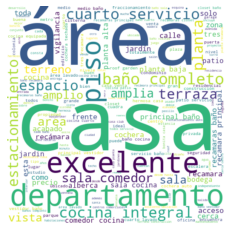

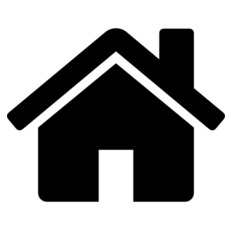

In [163]:
wc.generate(words)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(casa, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()